<a href="https://colab.research.google.com/github/RutLaura/StudyIndependent/blob/main/Rut_Laura_S_Tugas_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Problem Scopping
STUDI KASUS

Terdapat dataset konsumen dengan 2 kategori churn, yaitu pelanggan aktif (0) dan pelanggan yang sudah berhenti (1

Klasifikasi Konsumen

In [12]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

2. Data Akusisi





In [13]:
# load data
db = pd.read_csv('http://buku.dioskurn.com/buku1/ch9/churnprediction_ch9.csv', index_col=['customer_id'])
db

product  reload_1  reload_2    video  \
customer_id                                                              
285fae8412c4720a0c79d95f98434422  Kartu A  27734.30  24381.32  22000.0   
f45bce87ca6bf100f222fcc0db06b624  Kartu A  26433.00  26515.50      0.0   
09b54557b1e2a10d998e3473a9ccd2a0  Kartu A  93212.17  67101.83      0.0   
11f252f48be36f93dd429f2ec86cb2f5  Kartu A    183.33   1087.17      0.0   
a8df29ae9195eea348d2f74c967b978d  Kartu A  95296.67  76246.50      0.0   
...                                   ...       ...       ...      ...   
9e8b318d96caa9c0c4a50e8e59f5026c  Kartu B   1634.33  12085.33      0.0   
a310627191bdbded3905ac73e77fe319  Kartu B  30000.33  45170.67      0.0   
b6f11059e5c1df69b8c16d5c39af23dc  Kartu B   3333.33  13338.67      0.0   
88709f1defd232243f729912be696f87  Kartu B  25000.00  33333.33      0.0   
2c5bc32bc9a9c393d393bfc11c409b0d  Kartu C      0.00  11084.00      0.0   

                                    music     games    chat_1    chat_2  \
customer_id                                                               
285fae8412c4720a0c79d95f98434422  33009.9  25669.97    1716.0    2145.0   
f45bce87ca6bf100f222fcc0db06b624      0.0      0.00       0.0   15444.0   
09b54557b1e2a10d998e3473a9ccd2a0      0.0      0.00   86795.5   94649.5   
11f252f48be36f93dd429f2ec86cb2f5      0.0      0.00       0.0       0.0   
a8df29ae9195eea348d2f74c967b978d      0.0  11000.00  118800.0  104940.0   
...                                   ...       ...       ...       ...   
9e8b318d96caa9c0c4a50e8e59f5026c      0.0      0.00       0.0       0.0   
a310627191bdbded3905ac73e77fe319      0.0      0.00       0.0   20001.0   
b6f11059e5c1df69b8c16d5c39af23dc      0.0    872.00       0.0       0.0   
88709f1defd232243f729912be696f87      0.0  23497.33       0.0       0.0   
2c5bc32bc9a9c393d393bfc11c409b0d      0.0      0.00       0.0       0.0   

                                  socmed_1  socmed_2  internet  days_active  \
customer_id                                                                   
285fae8412c4720a0c79d95f98434422       0.0     792.0   11000.0           15   
f45bce87ca6bf100f222fcc0db06b624       0.0       0.0   74151.0           13   
09b54557b1e2a10d998e3473a9ccd2a0     330.0    1485.0   27467.0           15   
11f252f48be36f93dd429f2ec86cb2f5       0.0       0.0       0.0            2   
a8df29ae9195eea348d2f74c967b978d       0.0       0.0   63855.0           15   
...                                    ...       ...       ...          ...   
9e8b318d96caa9c0c4a50e8e59f5026c       0.0       0.0       0.0            1   
a310627191bdbded3905ac73e77fe319       0.0       0.0       0.0            1   
b6f11059e5c1df69b8c16d5c39af23dc       0.0       0.0       0.0            1   
88709f1defd232243f729912be696f87       0.0       0.0       0.0           15   
2c5bc32bc9a9c393d393bfc11c409b0d       0.0       0.0       0.0            1   

                                  tenure  churn  
customer_id                                      
285fae8412c4720a0c79d95f98434422     776      0  
f45bce87ca6bf100f222fcc0db06b624     352      0  
09b54557b1e2a10d998e3473a9ccd2a0    1987      0  
11f252f48be36f93dd429f2ec86cb2f5     285      0  
a8df29ae9195eea348d2f74c967b978d    1081      0  
...                                  ...    ...  
9e8b318d96caa9c0c4a50e8e59f5026c     490      1  
a310627191bdbded3905ac73e77fe319    3120      1  
b6f11059e5c1df69b8c16d5c39af23dc     483      1  
88709f1defd232243f729912be696f87     786      1  
2c5bc32bc9a9c393d393bfc11c409b0d     222      1  

[10000 rows x 14 columns]

In [14]:
# Pada product, nilai atribut Kartu A didefinisikan sebagai 0, Kartu B didefinisikan sebagai 1, dan Kartu C didefinisikan sebagai 2
db['product'] = db['product'].map({'Kartu A': 0,'Kartu B': 1, 'Kartu C':2})
db['product'].value_counts()
db

product  reload_1  reload_2    video  \
customer_id                                                              
285fae8412c4720a0c79d95f98434422        0  27734.30  24381.32  22000.0   
f45bce87ca6bf100f222fcc0db06b624        0  26433.00  26515.50      0.0   
09b54557b1e2a10d998e3473a9ccd2a0        0  93212.17  67101.83      0.0   
11f252f48be36f93dd429f2ec86cb2f5        0    183.33   1087.17      0.0   
a8df29ae9195eea348d2f74c967b978d        0  95296.67  76246.50      0.0   
...                                   ...       ...       ...      ...   
9e8b318d96caa9c0c4a50e8e59f5026c        1   1634.33  12085.33      0.0   
a310627191bdbded3905ac73e77fe319        1  30000.33  45170.67      0.0   
b6f11059e5c1df69b8c16d5c39af23dc        1   3333.33  13338.67      0.0   
88709f1defd232243f729912be696f87        1  25000.00  33333.33      0.0   
2c5bc32bc9a9c393d393bfc11c409b0d        2      0.00  11084.00      0.0   

                                    music     games    chat_1    chat_2  \
customer_id                                                               
285fae8412c4720a0c79d95f98434422  33009.9  25669.97    1716.0    2145.0   
f45bce87ca6bf100f222fcc0db06b624      0.0      0.00       0.0   15444.0   
09b54557b1e2a10d998e3473a9ccd2a0      0.0      0.00   86795.5   94649.5   
11f252f48be36f93dd429f2ec86cb2f5      0.0      0.00       0.0       0.0   
a8df29ae9195eea348d2f74c967b978d      0.0  11000.00  118800.0  104940.0   
...                                   ...       ...       ...       ...   
9e8b318d96caa9c0c4a50e8e59f5026c      0.0      0.00       0.0       0.0   
a310627191bdbded3905ac73e77fe319      0.0      0.00       0.0   20001.0   
b6f11059e5c1df69b8c16d5c39af23dc      0.0    872.00       0.0       0.0   
88709f1defd232243f729912be696f87      0.0  23497.33       0.0       0.0   
2c5bc32bc9a9c393d393bfc11c409b0d      0.0      0.00       0.0       0.0   

                                  socmed_1  socmed_2  internet  days_active  \
customer_id                                                                   
285fae8412c4720a0c79d95f98434422       0.0     792.0   11000.0           15   
f45bce87ca6bf100f222fcc0db06b624       0.0       0.0   74151.0           13   
09b54557b1e2a10d998e3473a9ccd2a0     330.0    1485.0   27467.0           15   
11f252f48be36f93dd429f2ec86cb2f5       0.0       0.0       0.0            2   
a8df29ae9195eea348d2f74c967b978d       0.0       0.0   63855.0           15   
...                                    ...       ...       ...          ...   
9e8b318d96caa9c0c4a50e8e59f5026c       0.0       0.0       0.0            1   
a310627191bdbded3905ac73e77fe319       0.0       0.0       0.0            1   
b6f11059e5c1df69b8c16d5c39af23dc       0.0       0.0       0.0            1   
88709f1defd232243f729912be696f87       0.0       0.0       0.0           15   
2c5bc32bc9a9c393d393bfc11c409b0d       0.0       0.0       0.0            1   

                                  tenure  churn  
customer_id                                      
285fae8412c4720a0c79d95f98434422     776      0  
f45bce87ca6bf100f222fcc0db06b624     352      0  
09b54557b1e2a10d998e3473a9ccd2a0    1987      0  
11f252f48be36f93dd429f2ec86cb2f5     285      0  
a8df29ae9195eea348d2f74c967b978d    1081      0  
...                                  ...    ...  
9e8b318d96caa9c0c4a50e8e59f5026c     490      1  
a310627191bdbded3905ac73e77fe319    3120      1  
b6f11059e5c1df69b8c16d5c39af23dc     483      1  
88709f1defd232243f729912be696f87     786      1  
2c5bc32bc9a9c393d393bfc11c409b0d     222      1  

[10000 rows x 14 columns]

In [15]:
db.columns

Index(['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure',
       'churn'],
      dtype='object')

In [16]:
#split dataset in features and target variable
x = db.iloc[:,1:13] # Features
y = db.iloc[:, 13] # Target variable

In [17]:
print(x, y)

                                  reload_1  reload_2    video    music  \
customer_id                                                              
285fae8412c4720a0c79d95f98434422  27734.30  24381.32  22000.0  33009.9   
f45bce87ca6bf100f222fcc0db06b624  26433.00  26515.50      0.0      0.0   
09b54557b1e2a10d998e3473a9ccd2a0  93212.17  67101.83      0.0      0.0   
11f252f48be36f93dd429f2ec86cb2f5    183.33   1087.17      0.0      0.0   
a8df29ae9195eea348d2f74c967b978d  95296.67  76246.50      0.0      0.0   
...                                    ...       ...      ...      ...   
9e8b318d96caa9c0c4a50e8e59f5026c   1634.33  12085.33      0.0      0.0   
a310627191bdbded3905ac73e77fe319  30000.33  45170.67      0.0      0.0   
b6f11059e5c1df69b8c16d5c39af23dc   3333.33  13338.67      0.0      0.0   
88709f1defd232243f729912be696f87  25000.00  33333.33      0.0      0.0   
2c5bc32bc9a9c393d393bfc11c409b0d      0.00  11084.00      0.0      0.0   

                                     

In [18]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9345


In [21]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('customer.png')
Image(graph.create_png())

3. Perhitungan skor feature apa yang paling penting

Feature: reload_1 Score:  0.04291656312987608 %
Feature: reload_2 Score:  0.357157256659735 %
Feature: video Score:  0.008024237494473676 %
Feature: music Score:  0.003428869058574246 %
Feature: games Score:  0.03355588415521668 %
Feature: chat_1 Score:  0.019111721448409617 %
Feature: chat_2 Score:  0.006689181247254496 %
Feature: socmed_1 Score:  0.003489172572829808 %
Feature: socmed_2 Score:  0.004889379705663283 %
Feature: internet Score:  0.04943177352597312 %
Feature: days_active Score:  0.2301141065546725 %
Feature: tenure Score:  0.24119185444732139 %


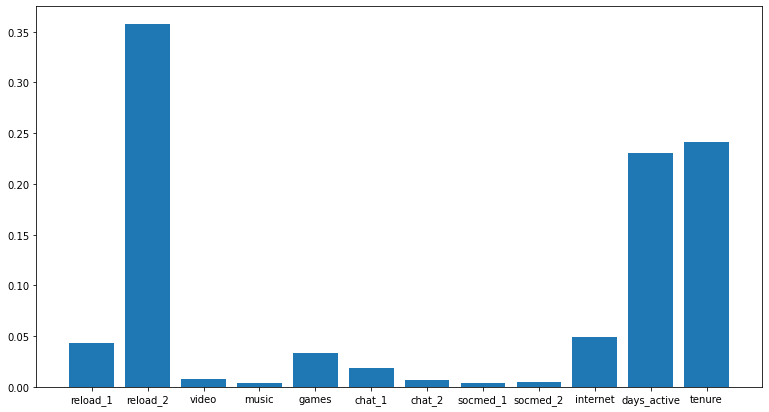

In [22]:
import matplotlib.pyplot as plt

importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature:', feature_cols[i],'Score: ', v, '%')
# plot feature importance
plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], importance)
plt.show()

Akurasi

In [25]:
# import libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [27]:
#Normalisasi Data
x = preprocessing.StandardScaler().fit(x).transform(x.astype(int))

In [28]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (8000, 12) (8000,)
Test set: (2000, 12) (2000,)


Modelling

In [51]:
k = 5
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier()

Evaluasi

In [52]:
yhat = knn.predict(x_test)
print(yhat)

[0 1 0 ... 1 0 0]


Akurasi

In [53]:
from sklearn import metrics
print("Train set Accuracy Data Training: ", metrics.accuracy_score(y_train, knn.predict(X_train))) #Evaluasi apakah AI berhasil training dengan baik
print("Test set Accuracy Data Test: ", metrics.accuracy_score(y_test, yhat)) #Evaluasi apakah AI berhasil memprediksi dengan benar/ mengukur kinerja model algoritma

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Train set Accuracy Data Training:  0.800625
Test set Accuracy Data Test:  0.9275


In [58]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.922 , 0.919 , 0.9265, 0.927 , 0.9275, 0.9245, 0.9255, 0.9265,
       0.9235])

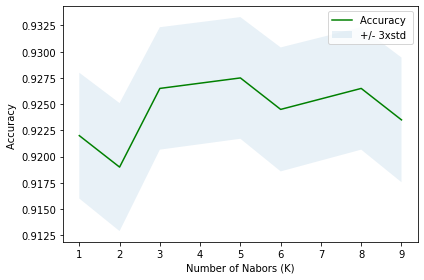

In [59]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()